# 2. Formulation
## 2.1 1D mechanical lattice on the inertial frame of reference

(629, 2) (629, 2, 2)


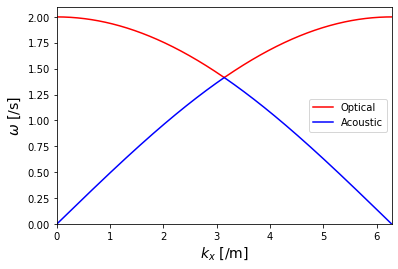

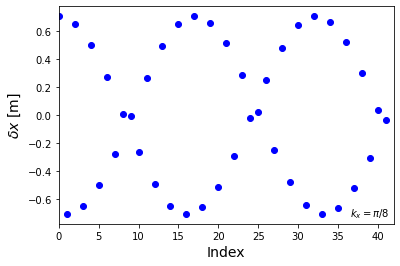

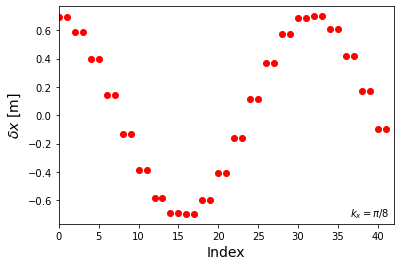

In [1]:
import numpy as np

κ = 1.
m = 1.
ω0 = np.sqrt(κ / m)
ks = np.arange(0, 2 * np.pi, 0.01)

evals_all = []
evecs_all = []
for k in ks: 
    K = np.exp(1.j * k)
    H = ω0 ** 2 * np.array([
        [2, -1 - K.conj()],
        [-1 - K, 2]
    ])
    evals, evecs = np.linalg.eigh(H)
    idcs = np.argsort(evals)
    evals, evecs = evals[idcs], evecs[idcs]
    evals_all.append(evals)
    evecs_all.append(evecs)
evals_all = np.array(evals_all)
evecs_all = np.array(evecs_all)


print(evals_all.shape, evecs_all.shape)

import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(ks, np.sqrt(evals_all[:, 1]).real, color='red', label='Optical')
plt.plot(ks, np.sqrt(evals_all[:, 0]).real, color='blue', label='Acoustic')
# plt.title("Dispersion relation", fontsize=18)
plt.xlabel(r"$k_x$ [/m]", fontsize=14)
plt.xlim(0, np.pi * 2)
plt.ylabel(r"$\omega$ [/s]", fontsize=14)
plt.ylim(0)
plt.legend()
plt.show()
# fig.savefig("1d-dispersion.png") 


# Plot acoustic mode
import matplotlib.pyplot as plt

fig = plt.figure()
N = 21
# wanted = 0
wanted = np.pi / 8
idx = min(range(len(ks)), key=lambda i: abs(ks[i]-wanted))
x = np.arange(N * 2)
acoustic = []
light = []
for i in range(N):
    K = np.exp(i * 1.j * ks[idx])
    acoustic.append((evecs_all[idx, :, 0] * K).real)
    light.append((evecs_all[idx, :, 1] * K).real)
plt.scatter(x, acoustic, color='blue')
# plt.title(r"Acoustic mode [$k_x=\pi/8$]", fontsize=18)
plt.figtext(.8, .15, r"$k_x=\pi/8$", fontsize=10)
plt.xlabel(r"Index", fontsize=14)
plt.xlim(0, N * 2)
plt.ylabel(r"$\delta x$ [m]", fontsize=14)
plt.show()
# fig.savefig("1d-acoustic.png") 

# Plot light mode
import matplotlib.pyplot as plt

fig = plt.figure()
plt.scatter(x, light, color='red')
plt.figtext(.8, .15, r"$k_x=\pi/8$", fontsize=10)
# plt.title(r"Optical mode [$k_x=\pi/8$]", fontsize=18)
plt.xlabel(r"Index", fontsize=14)
plt.xlim(0, N * 2)
plt.ylabel(r"$\delta x$ [m]", fontsize=14)
plt.show()
# fig.savefig("1d-optical.png") 

### Why don't need to worry about y direction wavenumber

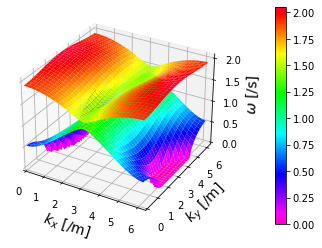

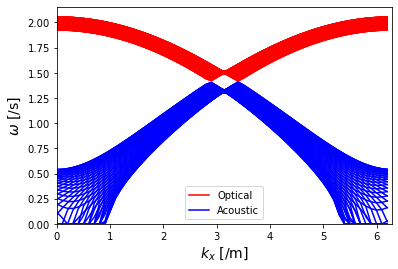

In [55]:


k = 1.
m = 1.
qxs = np.arange(0, 2 * np.pi, 0.1)
qys = np.arange(0, 2 * np.pi, 0.1)
Qxs = np.exp(1.j * qxs)
Qys = np.exp(1.j * qys)

M = np.diag([m] * 2)
iM = np.linalg.inv(M)

i = np.eye(2)

evals_all = np.empty((len(qys), len(qxs), 2), dtype=np.complex128)
# evecs_all = []
for y, Qy in enumerate(Qys): 
    for x, Qx in enumerate(Qxs):
        Q1 = np.cos(np.pi / 12) * Qx - np.sin(np.pi / 12) * Qy
        Q2 = np.cos(np.pi / 12) * Qx + np.sin(np.pi / 12) * Qy
        H = np.vstack([
            np.hstack([2 * k, -k * (1 + Q2.conj())]),
            np.hstack([-k * (1 + Q1), 2 * k]),
        ])
        evals, evecs = np.linalg.eigh(iM.dot(H))
        idcs = np.argsort(evals)
        evals, evecs = evals[idcs], evecs[idcs]
        evals_all[y, x] = evals
        # evecs_all.append(evecs)


import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
X, Y = np.meshgrid(qxs, qys)
vmax = np.amax(np.sqrt(evals_all[:, :, 1]).real)
ax.plot_surface(X, Y, np.sqrt(evals_all[:, :, 1]).real, vmin=0., vmax=vmax, cmap='gist_rainbow_r') 
p = ax.plot_surface(X, Y, np.sqrt(evals_all[:, :, 0]).real, vmin=0., vmax=vmax, cmap='gist_rainbow_r') 

ax.set_xlabel(r"$k_x$ [/m]", fontsize=14)
ax.set_xlim(0, np.pi * 2)
ax.set_ylabel(r"$k_y$ [/m]", fontsize=14)
ax.set_ylim(0, np.pi * 2)
ax.set_zlabel(r"$\omega$ [/s]", fontsize=14)
ax.set_zlim(0)
fig.colorbar(p, pad=0.15)
fig.savefig("1d-rationale.png")
plt.show()

import matplotlib.pyplot as plt
fig = plt.figure()
data = []
for y in range(len(qys)):
    if y == 0:
        plt.plot(qxs, np.sqrt(evals_all[y, :, 1]).real, color='red', label='Optical')
        plt.plot(qxs, np.sqrt(evals_all[y, :, 0]).real, color='blue', label='Acoustic')
        continue
    plt.plot(qxs, np.sqrt(evals_all[y, :, 1]).real, color='red')
    plt.plot(qxs, np.sqrt(evals_all[y, :, 0]).real, color='blue')
plt.xlabel(r"$k_x$ [/m]", fontsize=14)
plt.xlim(0, np.pi * 2)
plt.ylabel(r"$\omega$ [/s]", fontsize=14)
plt.ylim(0)
plt.legend()
fig.savefig("1d-rationale-proj.png")
plt.show()


## 2.2 1D mechanical lattice on the non-inertial reference frame
### 2.2.1 with Coriolis force

(63, 8) (63, 8, 8)


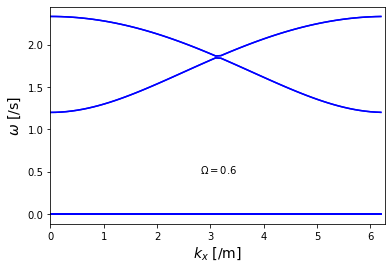

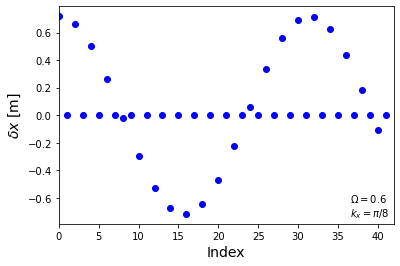

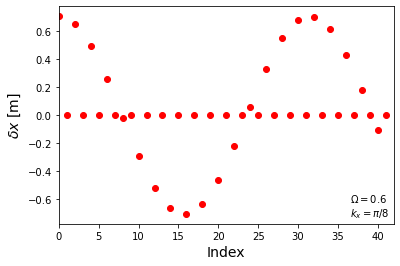

2.9725742248071083 pi
-1.3521887208189087 pi
3.1391094989504538 pi
4.300177804092812 pi


In [1]:
import numpy as np


O = 0.6
κ = 1.
m = 1.
w0 = np.sqrt(κ / m)
precision = 1e-1
ks = np.arange(0, 2 * np.pi, precision)

r11 = np.array([[1.], [0.]]) * np.array([[1.], [0.]]).T
r22 = np.array([[0.], [1.]]) * np.array([[0.], [1.]]).T
R = r11 + 0.1 * r22
rw = np.array([[0., 1.], [-1., 0.]])


evals_all = []
evecs_all = []
for k in ks: 
    K = np.exp(1.j * k)
    L11 = np.vstack([
        np.hstack([2 * r11, (-1 - K.conj()) * r11]),
        np.hstack([(-1 - K) * r11, 2 * r11])
    ])
    L12 = np.vstack([
        np.hstack([rw * 2.j * O, np.zeros((2, 2))]),
        np.hstack([np.zeros((2, 2)), rw * 2.j * O])
    ])

    transverse = False
    if transverse:
        L11 = np.vstack([
            np.hstack([2 * R, (-1 - K.conj()) * R]),
            np.hstack([(-1 - K) * R, 2 * R])
        ])
        L12 = np.vstack([
            np.hstack([rw * 2.j * O, np.zeros((2, 2))]),
            np.hstack([np.zeros((2, 2)), rw * 2.j * O])
        ])
    L = w0 ** 2 * np.vstack([
        np.hstack([L11, L12]),
        np.hstack([np.zeros((4, 4)), np.eye(4)])
    ])
    M = np.vstack([
        np.hstack([np.zeros((4, 4)), np.eye(4)]),
        np.hstack([np.eye(4), np.zeros((4, 4))])
    ])

    H = np.linalg.inv(M).dot(L)
    evals, evecs = np.linalg.eig(H)
    idcs = np.argsort(evals)
    evals, evecs = evals[idcs], evecs[idcs]
    evals_all.append(evals)
    evecs_all.append(evecs)
evals_all = np.array(evals_all)
evecs_all = np.array(evecs_all)


print(evals_all.shape, evecs_all.shape)


import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(8):
    plt.plot(ks, abs(evals_all[:, i].real), color='blue')
# plt.title(r"Dispersion relation $\Omega=$", O, r" [/s]")
plt.xlabel(r"$k_x$ [/m]", fontsize=14)
plt.xlim(0, np.pi * 2)
plt.ylabel(r"$\omega$ [/s]", fontsize=14)
plt.figtext(.47, .3, r"$\Omega=$" + f'{O:.1f}', fontsize=10)
plt.show()
# fig.savefig("1dc-dispersion-" + f'{O:.1f}' + ".png") 



# Plot acoustic mode
import matplotlib.pyplot as plt

fig = plt.figure()
N = 21
wanted = np.pi / 8
idx = min(range(len(ks)), key=lambda i: abs(ks[i]-wanted))
x = np.arange(N * 2)
acoustic = []
light = []
for i in range(N):
    K = np.exp(i * 1.j * ks[idx])
    a = (evecs_all[idx, :, 6] * K).real
    l = (evecs_all[idx, :, 7] * K).real
    acoustic.append([a[0], a[2]])
    light.append([l[0], l[2]])
plt.scatter(x, acoustic, color='blue')
plt.xlabel(r"Index", fontsize=14)
plt.xlim(0, N * 2)
plt.ylabel(r"$\delta x$ [m]", fontsize=14)
plt.figtext(.8, .2, r"$\Omega=$" + f'{O:.1f}', fontsize=10)
plt.figtext(.8, .15, r"$k_x=\pi/8$", fontsize=10)
plt.show()
# fig.savefig("1dc-acoustic-" + f'{O:.1f}' + ".png") 

# Plot light mode
import matplotlib.pyplot as plt

fig = plt.figure()
plt.scatter(x, light, color='red')
# plt.title(r"Optical mode ($k_x=\pi/8$)")
plt.xlabel(r"Index", fontsize=14)
plt.xlim(0, N * 2)
plt.ylabel(r"$\delta x$ [m]", fontsize=14)
plt.figtext(.8, .2, r"$\Omega=$" + f'{O:.1f}', fontsize=10)
plt.figtext(.8, .15, r"$k_x=\pi/8$", fontsize=10)
plt.show()
# fig.savefig("1dc-optical-" + f'{O:.1f}' + ".png") 

# Winding number
for i in range(4,8):
    mode = i
    e = evecs_all[:, mode, :4]
    e_ = (e[1:] - e[:-1]) / precision


    # Berry phase
    result = 0
    for i in range(len(e_)):
        result += e[i+1].conj().T.dot(e_[i])
    print((1.j * result).real / np.pi, 'pi')



## 2.3. Simulation
### 2.3.3 + Centrifugal, transverse force

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

mat = np.array([[0., -1.], [1., 0.]])
a = np.array([1., 0.])

def regulate_r(r):
    return np.clip(r, -1., 1.)

def calc_F(r, v, k: float, m: float, N: int, O: float):
    F = np.array([[0., 0.]] * N)
    xs = r[:, 0]
    ys = r[:, 1]
    # Spring
    for i, x in enumerate(xs):
        F[i][0] = k * (xs[i-1] - x) + k * (xs[(i+1)%N] - x)
    # Spring, transverse
    for i, y in enumerate(ys):
        F[i][1] = 0.1 * (k * (ys[i-1] - y) +  k * (ys[(i+1)%N] - y))
    # Coriolis
    for i, v_ in enumerate(v):
        F[i] += -2 * O * mat.dot(v_)
    # Centrifugal
    for i, v_ in enumerate(v):
        F[i] += -O**2 * mat.dot(mat.dot(v_))
    return F



N = 24 # number of mass
k = 1. # N/m
m = 1. # kg
O = .2 # /s


r = np.array([[0., 0.]] * N) # m
v = np.array([[0., 0.]] * N) # m/s
v_ = np.array([[0., 0.]] * N) # m/s previous velocity
F = np.array([[0., 0.]] * N)
F[N//2-1][0] = 3. # Perturbation at the centor 


rs = [r.tolist()]
for _ in range(30):
    dt = 0.5
    a = F / m
    v += a * dt
    r += v_ * dt
    # r = regulate_r(r)
    rs.append(r.tolist())
    v_ = v
    F = calc_F(r, v, k, m, N, O)
rs = np.array(rs)



for r in rs:
    plt.quiver(r[:, 0], r[:, 1], scale=1., units='xy')
    plt.show()
